## KNN algorithm 
### Dataset 2

In [25]:
import nbimporter
from Helper import * 
%matplotlib inline
random_seed = 42

In [26]:
X_train, X_test, y_train, y_test = import_dataset2()

number of training samples:  2520
number of test samples:  630


In [38]:
options=['uniform', 'distance']
k_range=list(range(3,20))
p_values = [1,2]
leaf_sizes = [10,20,30,40,50]

param_grid = dict(n_neighbors=k_range, weights=options, p=p_values, leaf_size=leaf_sizes)

knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_grid, cv=StratifiedKFold(5), scoring='roc_auc', random_state=random_seed, n_jobs=1)
rand.fit(X_train, y_train)

print('\nBest Score : %.2f'%rand.best_score_, ' Best Params : ', str(rand.best_params_))


Best Score : 0.90  Best Params :  {'weights': 'distance', 'p': 1, 'n_neighbors': 19, 'leaf_size': 50}


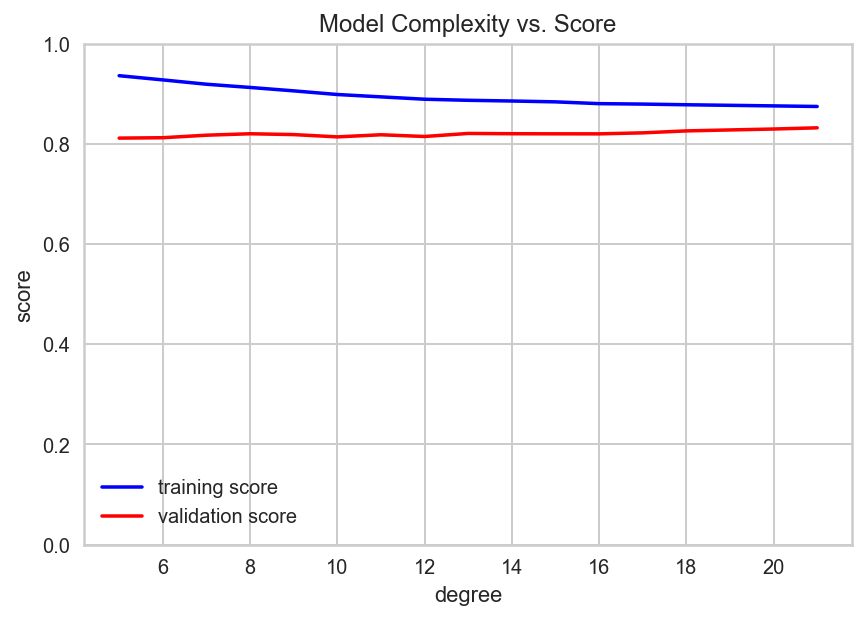

In [40]:
k_range=list(range(5,22))
train_score, val_score = validation_curve(KNeighborsClassifier(weights='uniform'), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'n_neighbors', 
                                          param_range = k_range,
                                          cv=StratifiedKFold(5))

plt.plot(k_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(k_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity vs. Score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = StratifiedKFold(5, random_state=random_seed)

estimator = SVC(random_state=0, kernel='linear', tol=0.1, gamma='auto', class_weight=None)
estimator1 = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='auto', class_weight=None)

title = "Learning Curves (SVM Training Dataset 1 - Linear Kernel)"
plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
plt.tight_layout()

title = "Learning Curves (SVM Test Dataset 1 - rbf Kernel)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[1, :])

plt.tight_layout()
plt.show()

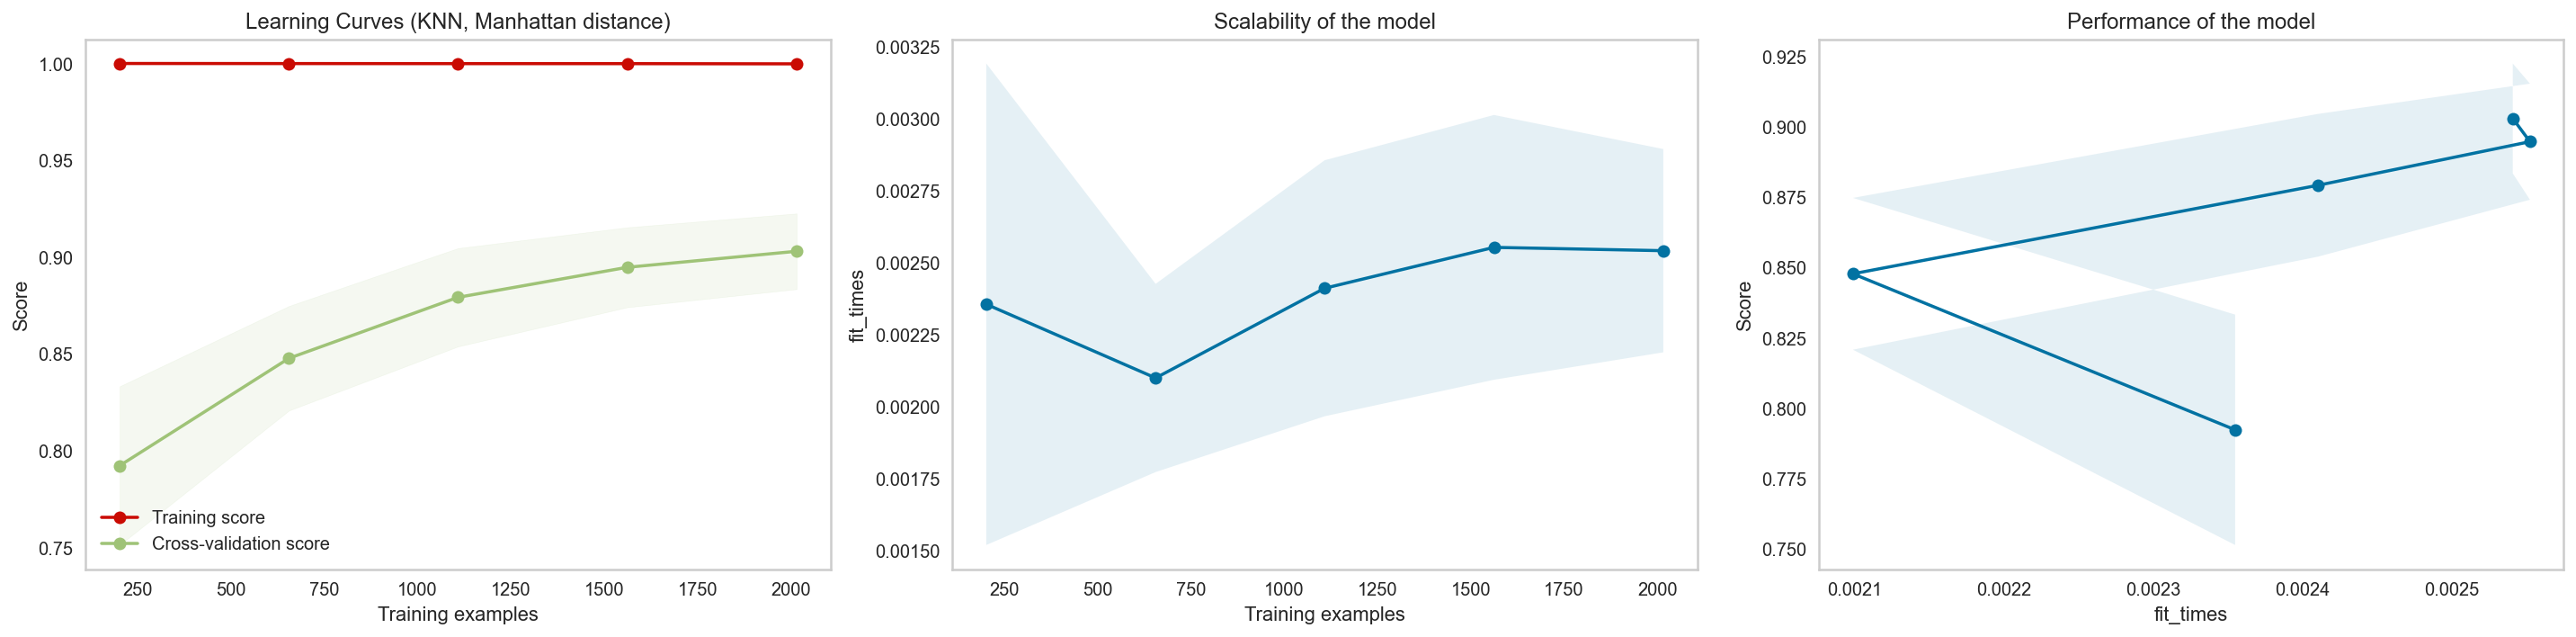

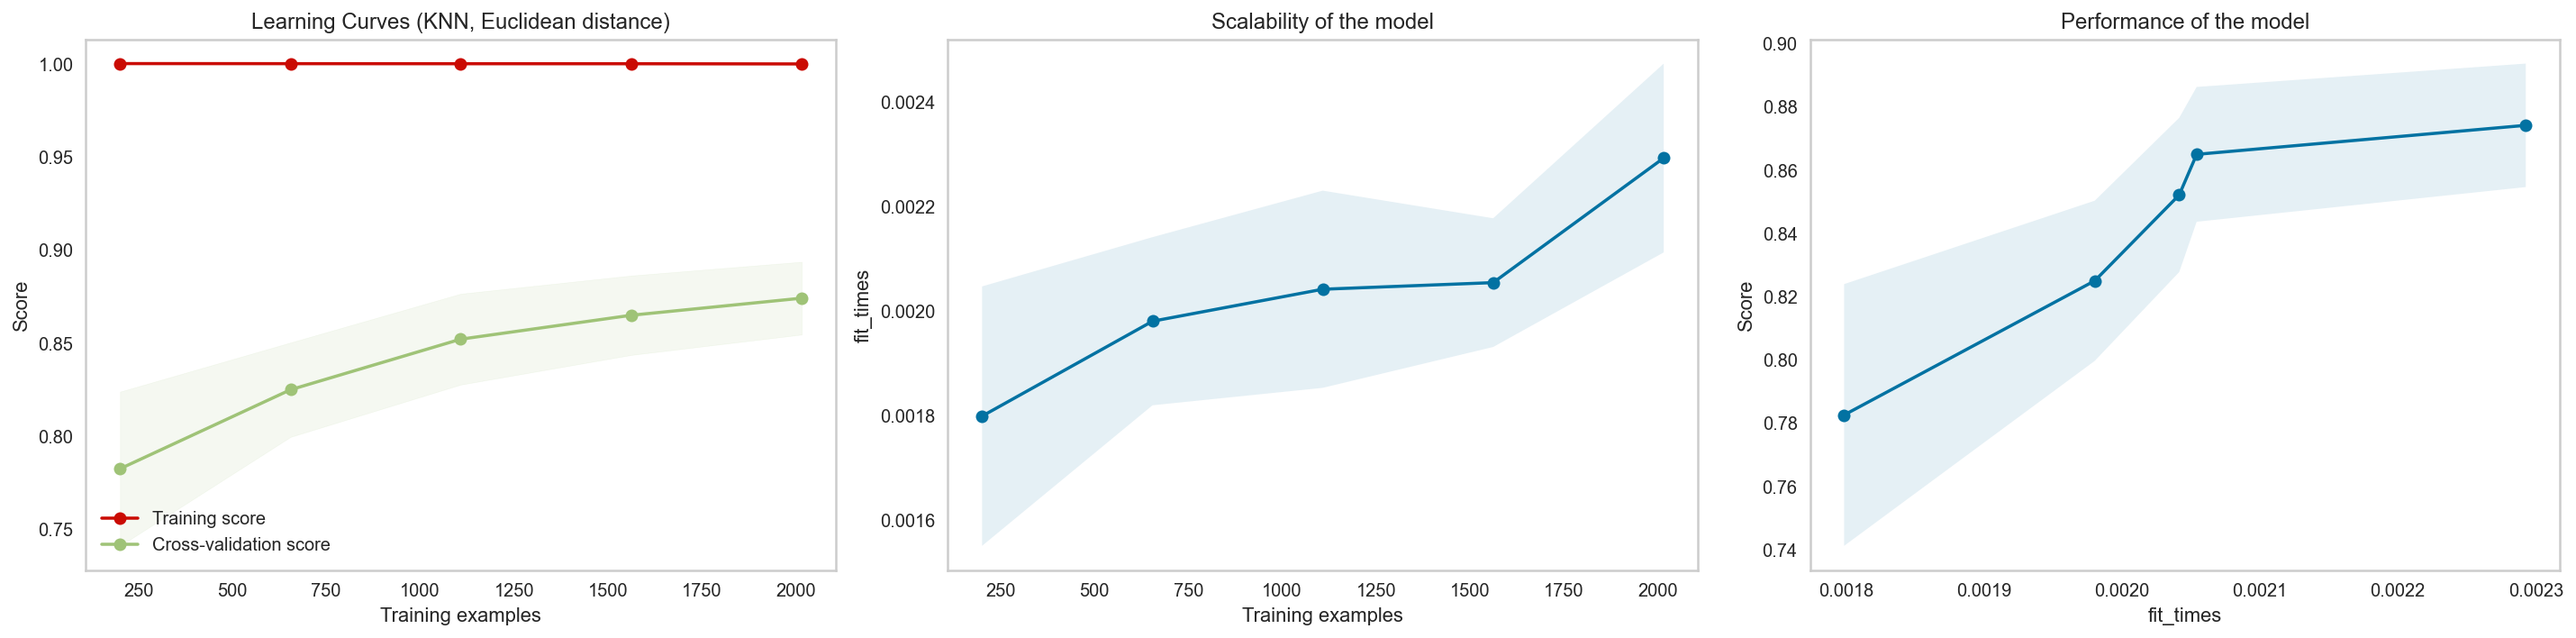

In [59]:
estimator = KNeighborsClassifier(weights= 'distance', p= 1, n_neighbors= 19, leaf_size= 50)
estimator1 = KNeighborsClassifier(weights= 'distance', p= 2, n_neighbors= 19, leaf_size= 50)

title = "Learning Curves (KNN, Manhattan distance)"
plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
plt.tight_layout()

title = "Learning Curves (KNN, Euclidean distance)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)
plt.tight_layout()

plt.show()

In [54]:
classifier = KNeighborsClassifier(weights='uniform', n_neighbors=19, leaf_size=50, p=1)


In [61]:
%%timeit
classifier.fit(X_train, y_train)

2.14 ms ± 68.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
y_pred = classifier.predict(X_test)

20.3 ms ± 932 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


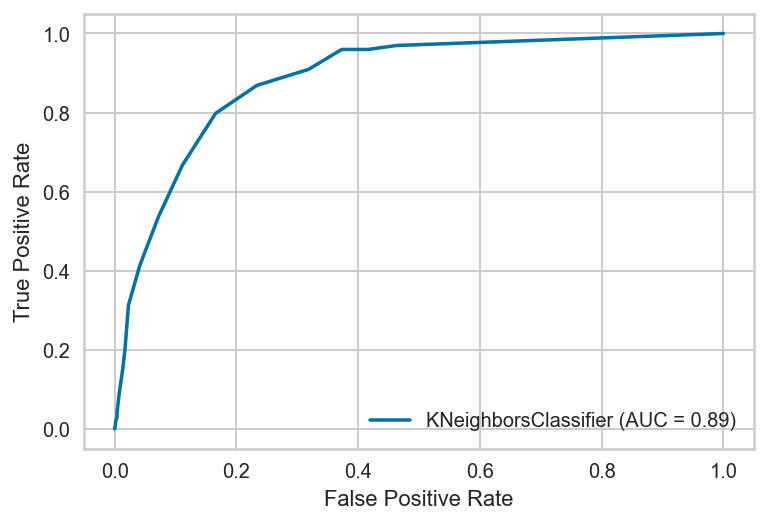

In [47]:
plot_roc_curve(classifier, X_test, y_test);

In [48]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.884157,0.977401,0.928444,531.000000
1,0.720930,0.313131,0.436620,99.000000
accuracy,0.873016,0.873016,0.873016,0.873016
macro avg,0.802543,0.645266,0.682532,630.000000
weighted avg,0.858507,0.873016,0.851157,630.000000
